In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Thursday, September 21, 2023

## Overview

- Difference Equations

- Lambda Functions and Scope

- `map()`, `filter()`, and `reduce()`

## Difference Equations

A difference equation is of the form

$$ x_{t+1} = f(x_t) $$

where $f$ is a function of $x_t$.

### Examples

- **Logistic Map**
  $$x_{t+1} = rx_t(1 - x_t)$$

- **Ricker Model**
  $$x_{t+1} = x_t e^{r(1 - x_t)}$$

### Fixed Points

A fixed point is a value $x^*$ such that $f(x^*) = x^*$.

For the logistic map, the fixed points can be solved exactly and are $x^* = 0$ and $x^* = 1 - 1/r$.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def logistic(x, r):
    return r*x*(1-x)

In [5]:
r = 3
xs = [0.1]

for i in range(300):
    xs.append(logistic(xs[-1], r))

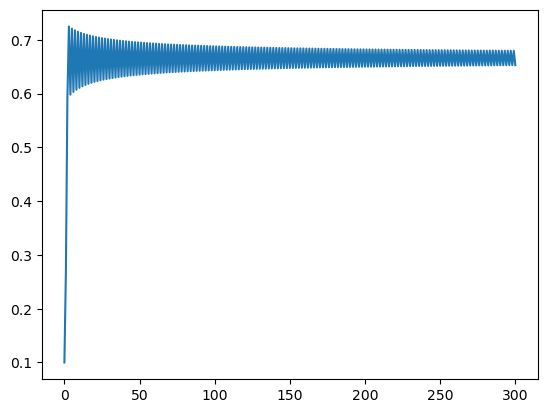

In [6]:
plt.plot(xs)

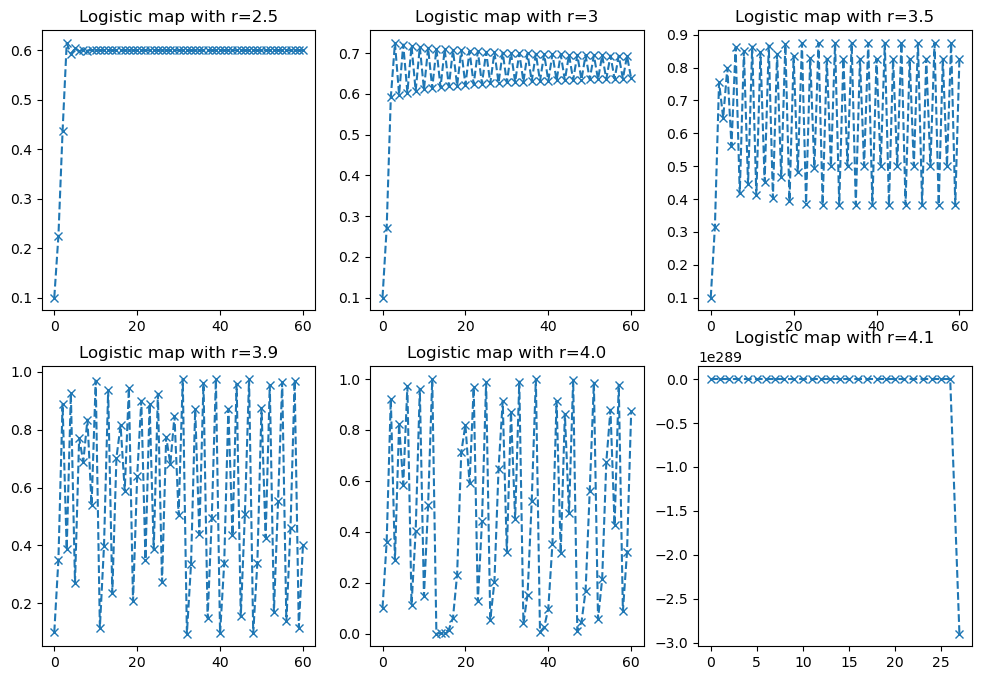

In [7]:
# plot of logistic map for a few values of r

rs = [2.5, 3, 3.5, 3.9, 4.0, 4.1]
plt.figure(figsize=(12, 8))
for r in rs:
    xs = [0.1]

    for i in range(60):
        xs.append(logistic(xs[-1], r))
        
    plt.subplot(2, 3, rs.index(r)+1)
    plt.plot(xs, '--x')
    plt.title(f"Logistic map with r={r}")

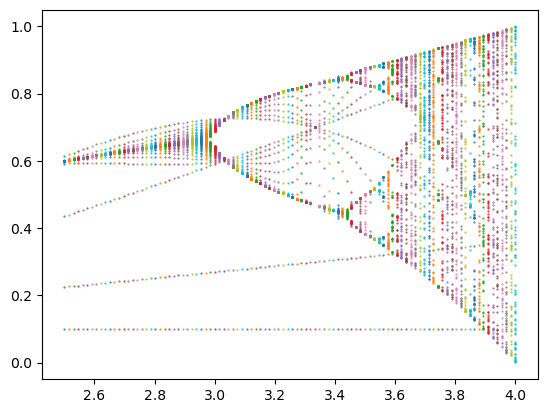

In [31]:
# bifurcation diagram for logistic map

rs = np.linspace(2.5, 4.0, 100)

plt.figure()

# for each r we will calculate the logistic x_ns
for r in rs:

    xs = [0.1]

    for i in range(100):
        xs.append(logistic(xs[-1], r))

    # print(r, len(xs))

    plt.plot([r]*len(xs), xs, '.', markersize=1)

In [ ]:
# bifurcation diagram for logistic map

rs = np.linspace(2.5, 4.0, 100)

plt.figure()

# for each r we will calculate the logistic x_ns
for r in rs:

    xs = [0.1]

    for i in range(100):
        xs.append(logistic(xs[-1], r))

    # print(r, len(xs))

    plt.plot([r]*len(xs[-20:]), xs[-20:], '.', markersize=1)

## Lambda Functions

What is different in the two similar code cells below. Why do they behave differently?

In [37]:
f = lambda n: lambda x: x**n

In [53]:
# 1.

external_n = []
local_n = []

for n in range(4):
    local_n.append(lambda x: x**n)
    external_n.append(f(n))

n=10
print(local_n[2](2))
print(external_n[2](2))


1024
4


In [52]:
# 2.

external_n = []
local_n = []

for n in range(4):
    local_n.append(lambda x, n=n: x**n)
    external_n.append(f(n))

n=10
print(local_n[2](2))
print(external_n[2](2))

4
4


The first one uses global scope n, 

The second one uses the value of n that is there when it is defined.


## map() and filter()

In [40]:
from functools import reduce

In [47]:
print([x**2 for x in range(10)])

print(list(map(lambda x: x**2, range(10))))

print(np.array(list(range(10)))**2)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[ 0  1  4  9 16 25 36 49 64 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [48]:
print([x for x in range(10) if x%2==0])

print(list(filter(lambda x: x%2==0, range(10))))

[0, 2, 4, 6, 8]
[0, 2, 4, 6, 8]


In [35]:
print(reduce(lambda x,y: x+y, range(10)))
print(sum(range(10)))


45
45


In [36]:
from functools import reduce
reduce(lambda x,y: x*y, range(1,10))


362880

# Extraordinary function composition

In [60]:
from scipy.optimize import fsolve
from functools import reduce 

compose = lambda f, g: ( lambda x: f(g(x)) )
identity = lambda x : x
composite = lambda f, n: identity if n == 0 else reduce(compose, [f] * n)

composite(lambda x: x**2, 2)(2)

16

this is like $(2^2)^2$

or generally for $f(x) = x^2$,

$f(f(2))$